<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/logo.png" width="100"/>

# DSGT Bootcamp Week 3: Introductory Data Preprocessing

## Learning Objectives  

1) Have a basic idea of what machine learning fundamentally

3)  Learn three Ways to Conceptualize Models and Data  

4)  Understand the Difference Between Classification and Regression  

 
5)  Be able to pre-process data (eg: missing value, imputation, feature engineering, feature removal)

<img src="https://media.istockphoto.com/vectors/machine-learning-3-step-infographic-artificial-intelligence-machine-vector-id962219860?k=6&m=962219860&s=612x612&w=0&h=yricYyUqZbILMHp3IvtenS3xbRDhu1w1u5kk2az5tbo=" width="400"/>   


# Accessing the Titanic Dataset

You get the idea!

In [1]:
import pandas as pd
import numpy as np

import warnings # filtering out messy warning messages
warnings.filterwarnings("ignore")

### What is machine learning?
Machine Learning is the process of **turning data into actionable knowledge** for **task support** and **decision making**.

 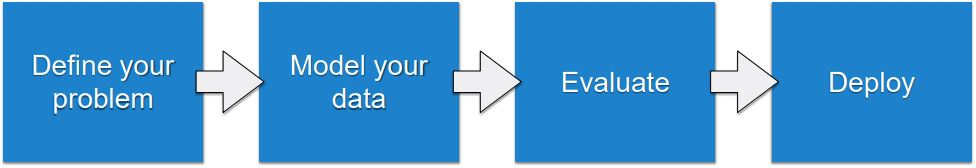


<h1>Unsupervised learning for data exploration</h1>
<ul><li>Clustering analysis, dimensionality reduction, kernel density estimation</li></ul>
<h1>Supervised learning for predictive analysis</h1>
<ul><li>Tree-based models: A state at a node splits into branches based on certain probabilities to make a decision. A node which doesn't split is the decision or leaf. Characterized by continuous splitting from one "root" at the top.</li></ul>
<ul><li>Linear classification/regression: Drawing a linear plot/best fit line to match a set of data, or to separate distinct groups.</li></ul>
<ul><li>Neural networks: A layer of inputs are put through a series of weights in hidden layers to produce a layer of outputs.</li></ul>

### There are 3 main ways to consider ML models. 
1) Pictorially  
2) Using decision boundaries  
3) Mathematically    
Let's walk through each of them 

## 1) Pictorially
#### Can you guess which picture corresponds to which algorithm?
a) Neural Network b) Decision Tree c) Support Vector Machine (SVM)  

 
<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/Screen%20Shot%202020-06-20%20at%204.47.51%20PM.png"  height='200'>


<!--  
<img src="https://drive.google.com/uc?id=1OVtVVcwWkF0disA33iQE4MxwlaAvVnfu"  height='200'> -->


## 2) Decision Boundaries  
####  Now we can plot decision boundaries  
Decision boundaries can intuitively be thought of how an ML model is making decisions.    
These boundaries will determine which class a given instance belongs to.   
We can see below how a decision boundary is differentiating between the two classes -- let's say Class Dog and Class Cat  


<!-- <img src="https://drive.google.com/uc?id=1qmwspJdtAuU7c5rA3dtljXNm-Ni7-Jk2"  height='200'> -->
<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/Screen%20Shot%202020-06-20%20at%204.56.48%20PM.png"  height='200'>


Some models you can use are decision tree, a KNN (k-nearest neighbors), an SVM (simple vector machine), and a simple neural network   
These are all very popular algorithms in industry and in academia!

### 3) Mathematic Formulations    
Think: What is a model that is using features to predict a class doing?  
You are taking in as INPUT the columns. You are getting as OUTPUT a classification   
Thus, you are finding a MAPPING between the INPUT and the OUTPUT  

f: X → Y   
f(x) = y

 
<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/Screen%20Shot%202020-05-16%20at%205.33.50%20PM.png" height='300'>


#### Let's focus on a regression model. Now we can look at the mathematical formula  
Intuition : linear regression looks something like this: y=mx+b      
    
<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/Screen%20Shot%202020-06-20%20at%204.51.22%20PM.png" height='300'>

The goal of ML is to adjust the PARAMETERS to OPTIMIZE performance 

## Classification vs Regression 
Can you state the difference between classification and regression?  
Which has a discrete and which has a continuous output?


<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/Screen%20Shot%202020-06-20%20at%204.48.26%20PM.png" height='300'>


## Why do we need data preprocessing? 

When you recieve data, there can be a lot to fix.  
Potential issues include:   
1) Flaws in the data itself (ex poor formatting or missing values)     
2) Information could still be added (maybe creating your own features?)  
3) Some data may be redundant or straight up not be useful 

<img src="https://miro.medium.com/max/1200/1*K6ctE0RZme0cqMtknrxq8A.png" width="350">

# Missing Values & Value Imputation

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/03/How-to-Handle-Missing-Values-with-Python.jpg" width="300px">

How would you handle missing values? Many algorithms will not run with NaNs or missing values.  
\
One approach may be to delete all rows with missing values.   
An example is removing all users with a missing field, such as age. However, you could lose a lot of data this way    
\
**Value Imputation** is an intelligent way of filling  in missing values. The following exercise walks through deleting random values from a few columns and then fixing them using a few different types of imputation. 

In [2]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Creating a new dataframe with a subset of columns from the original
mini_df = df[['PassengerId', 'Age', 'Fare']] # Recap: what are we doing here? 
mini_df


,PassengerId,Age,Fare
0,1,22.0,7.2500
1,2,38.0,71.2833
2,3,26.0,7.9250
3,4,35.0,53.1000
4,5,35.0,8.0500
...,...,...,...
886,887,27.0,13.0000
887,888,19.0,30.0000
888,889,NaN,23.4500
889,890,26.0,30.0000


In [4]:
# Generating missing values -- used for the purpose of the exercise
# Not critical to understand or reproduce!

# remove 20% of data from the features
np.random.seed(1)

mini_df['PassengerId'] = \
    mini_df['PassengerId'].mask(np.random.random(mini_df['PassengerId'].shape) < .2)

mini_df['Age'] = \
    mini_df['Age'].mask(np.random.random(mini_df['Age'].shape) < .2)

mini_df['Fare'] = \
    mini_df['Fare'].mask(np.random.random(mini_df['Fare'].shape) < .2)
mini_df

,PassengerId,Age,Fare
0,1.0,22.0,7.2500
1,2.0,38.0,71.2833
2,NaN,26.0,7.9250
3,4.0,35.0,53.1000
4,NaN,35.0,8.0500
...,...,...,...
886,887.0,27.0,13.0000
887,NaN,19.0,30.0000
888,889.0,NaN,23.4500
889,890.0,26.0,30.0000


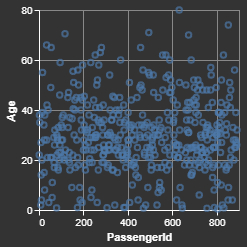

In [5]:
(lambda: DeepnoteChart(mini_df, """{"mark":{"type":"point","tooltip":true},"$schema":"https://vega.github.io/schema/vega-lite/v4.json","encoding":{"x":{"sort":null,"type":"quantitative","field":"PassengerId","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Age","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(mini_df, """{"mark":{"type":"point","tooltip":true},"$schema":"https://vega.github.io/schema/vega-lite/v4.json","encoding":{"x":{"sort":null,"type":"quantitative","field":"PassengerId","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Age","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}"""))()

What changes were made?

In [6]:
mini_df.isnull()

,PassengerId,Age,Fare
0,False,False,False
1,False,False,False
2,True,False,False
3,False,False,False
4,True,False,False
...,...,...,...
886,False,False,False
887,True,False,False
888,False,True,False
889,False,False,False


In [7]:
mini_df.isnull().sum(axis = 1) 
# Question? Any guesses as to what axis=0 means? 

0      0
1      0
2      1
3      0
4      1
      ..
886    0
887    1
888    1
889    0
890    0
Length: 891, dtype: int64

## Types of Imputation
- Fixed values (all 0s)  
- Measures of central tendency (the mean, median, mode of existing entries) 
- Backfilling (filling with the prior existing value)

<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/nan.png" width="600"/>

In [8]:
# An example of fixed-value imputation
mini_df['PassengerId'].fillna('0', inplace=True) # what does inplace=True mean?
mini_df.isnull().sum(axis=0) 
mini_df

,PassengerId,Age,Fare
0,1.0,22.0,7.2500
1,2.0,38.0,71.2833
2,0,26.0,7.9250
3,4.0,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,887.0,27.0,13.0000
887,0,19.0,30.0000
888,889.0,NaN,23.4500
889,890.0,26.0,30.0000


In [9]:
# An example of mean-imputation
mini_df['Age'].fillna(mini_df['Age'].mean(), inplace=True)

# An example of backfill-imputation
mini_df['Fare'].fillna(method="backfill", inplace=True)

mini_df
mini_df.isnull().sum()

PassengerId    0
Age            0
Fare           0
dtype: int64

Discussion: In what cases would you use each approach? 

# Feature Creation and Manipulation
We can make features (or columns) from scratch. We can also derive them from existing columns  
We can consider feature engineering here as accessing rows and columns of the dataframe

### Editing with Rows

In [10]:
# Let's start by viewing the head of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Recap: Who remembers what 0 indexing means? 
df.iloc[2] # This returns a single row, called a series

# What row of the dataframe does this return?

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                              26.0
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

In [12]:
# We can chain .iloc with filtering to pick a value at a specific row and column
df.iloc[2]['Age']

26.0

In [13]:
# We can also use the assignment operator to change the value in an area
# *= is a special variant that multiples the existing value by whatever is on
# the right side of the operator
df.at[2,'Age'] *=  1.25 
df.at[2,'Age']
df.iloc[2]


PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                              32.5
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

Can you  figure out the value of Fare for the 10th row?

### Editing with Columns

Creating columns is a big part of feature engineering. You can create a column with a chosen value, with a random value, or by changing values of other columns

In [14]:
# creating a column
df['New_Column_Chosen_Value'] = 2 # we can choose one constant value
df['New_Column_Random_Value'] = np.random.rand() # we can randomly generate a value
df['MoreExpensiveFare'] = df['Fare'] + 1  # we can manipulate old columns

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Column_Chosen_Value,New_Column_Random_Value,MoreExpensiveFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.327594,8.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.327594,72.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,32.5,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.327594,8.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.327594,54.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0.327594,9.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2,0.327594,14.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2,0.327594,31.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2,0.327594,24.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,2,0.327594,31.0000


## Feature Creation Using the "where" Syntax  
Think of this as a conditional statement: "Make a change **where** condition"  
For example, we can make a binary feature. 
We will create feature isLargeLot. You have a large lot **where** large lot > 9500

https://www.w3schools.com/sql/sql_where.asp

In [15]:
df['isAffordable'] = 1
df['isAffordable'].where(df["Fare"] < 8, 0, inplace=True) #The zero parameter is the else value. 
                                                          #We are inserting a 0 where condition is met
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Column_Chosen_Value,New_Column_Random_Value,MoreExpensiveFare,isAffordable
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.327594,8.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.327594,72.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,32.5,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.327594,8.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.327594,54.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0.327594,9.0500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2,0.327594,14.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2,0.327594,31.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2,0.327594,24.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,2,0.327594,31.0000,0


In [16]:
# try to create a mini dataframe containing only where Age == 22
my_df = df[df['Age'] == 22]

my_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Column_Chosen_Value,New_Column_Random_Value,MoreExpensiveFare,isAffordable
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.327594,8.2500,1
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,2,0.327594,8.2292,1
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S,2,0.327594,10.0000,0
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,2,0.327594,9.0500,0
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S,2,0.327594,8.7500,1
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,2,0.327594,67.6000,0
212,213,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,NaN,S,2,0.327594,8.2500,1
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,2,0.327594,10.3500,0
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S,2,0.327594,8.1250,1
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S,2,0.327594,8.8958,1


We can also derive features from other features. For example, lets make a product

In [17]:
df['Age Weighted Fare'] = df['Age']*df['Fare'] 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Column_Chosen_Value,New_Column_Random_Value,MoreExpensiveFare,isAffordable,Age Weighted Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.327594,8.2500,1,159.5000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.327594,72.2833,0,2708.7654
2,3,1,3,"Heikkinen, Miss. Laina",female,32.5,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.327594,8.9250,1,257.5625
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.327594,54.1000,0,1858.5000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0.327594,9.0500,0,281.7500


In [18]:
# try incrementing all values in the "Age" by 1
 
# answer  df['Age'] + 1

## Non-Useful Data
Another data flaw can be that non-useful data may be included.  
Why is this a problem?      
- You don't get useful information 
- Information overload can cloud analysis  
- Extra information can increase dataset size
- Extra information can increase computational overhead   

<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/cube.png" width="500"/>  









In [19]:
# dropping columns is easy  
# we will drop all of the columns we made 
my_df.drop(columns=['isAffordable'], axis=1, inplace=True)
my_df.drop(columns=['New_Column_Chosen_Value', 'New_Column_Random_Value', 'MoreExpensiveFare'], axis=1, inplace=True)
my_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S


# Feature manipulation: Words vs Numbers  
Intuition: A machine does a great job of interpreting *numbers*. People are able to interpret the symantics and meanings of words, yet your computer cannot.   

Fact: You will need to make sure that your features are **discrete** or **continuous** numerical values -- not **categorical**   

Let's take a look at the Name, Sex and Cabin columns

In [20]:
df[['Name', 'Sex', 'Cabin']]

,Name,Sex,Cabin
0,"Braund, Mr. Owen Harris",male,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85
2,"Heikkinen, Miss. Laina",female,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123
4,"Allen, Mr. William Henry",male,NaN
...,...,...,...
886,"Montvila, Rev. Juozas",male,NaN
887,"Graham, Miss. Margaret Edith",female,B42
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,C148


In [21]:
print(df.Name.unique())
print(df.Sex.unique())
print(df.Cabin.unique())

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

There are two popular ways of encoding these values. 
One is to match each feature to a value. Ex. 'Reg' to 1, IR1 to 2.... Family to 6  
Another is to "one-hot-encode" -- or turn each feature into a set of binary features.  
Ex. normal: yes or no? Abnormal: 0 or 1. 
### Find and replace

In [22]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
#distinct values for Embarked
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
#fill nan in 'Embarked' column with 'Q'
titanic['Embarked'] = titanic['Embarked'].fillna('Q')
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
# using a dictionary
cleanup_nums = {"Embarked":     {'S': 1, 'C': 2, 'Q':3}}
titanic.replace(cleanup_nums, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1


In [26]:
# using catcodes
# assigns a number to each unique entry
# guesses as to any concerns with this approach? 
titanic["Pclass"] = titanic["Pclass"].astype('category')
titanic["Pclass"] = titanic["Pclass"].cat.codes

titanic["SibSp"] = titanic["SibSp"].astype('category')
titanic["SibSp"] = titanic["SibSp"].cat.codes

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,0,2,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1


One-hot encoding. Binary yes or no. 
Note the Street_Grvl and Street_Pave Features

In [27]:
# look at the result. Can you guess what happened? 
titanic = pd.get_dummies(titanic, columns=["Pclass", 'Sex', 'Cabin'])
titanic.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_0,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,True,...,False,False,False,False,False,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,True,...,False,False,False,False,False,False,False,False,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,False,...,False,False,False,False,False,False,False,False,False,False


## Let's do a final cleanup. 
We will drop all features with remaining nans.
We will also get rid of all object data types (bad in practice but will save time here!)

In [28]:
titanic.dropna(axis=1, how='any', inplace=True) #drop the columns
titanic

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Embarked,Pclass_0,Pclass_1,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,2,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,1,True,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,1,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,0,211536,13.0000,1,False,True,...,False,False,False,False,False,False,False,False,False,False
887,888,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,1,True,False,...,False,False,False,False,False,False,False,False,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,1,False,False,...,False,False,False,False,False,False,False,False,False,False
889,890,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,2,True,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
titanic = titanic.select_dtypes(exclude=['object'])
titanic.head()

,PassengerId,Survived,SibSp,Parch,Fare,Embarked,Pclass_0,Pclass_1,Pclass_2,Sex_female,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,1,0,7.2500,1,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,0,71.2833,2,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,3,1,0,0,7.9250,1,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,0,53.1000,1,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,5,0,0,0,8.0500,1,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


## Testing It Out: The effects of any data manipulation on misc. ML tasks  

For example, let's take a look at performance as we run feature selection using simple (one-variable) linear regression 

<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/reg.png" width="400"/>


We can also choose to run multiple linear regression on any of the features we want. Let's select only useful features, a process known as **feature selection**  

<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/features.png" width="690"/>

So, what do we have to work with?

In [30]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'New_Column_Chosen_Value', 'New_Column_Random_Value',
       'MoreExpensiveFare', 'isAffordable', 'Age Weighted Fare'],
      dtype='object')

# Dimensionality Reduction Exercise

#### What if we have a dataset with millions of features? What do we do? How can we reduce the dimensionality?  

In [31]:
#As you can see in the above dataset, we have approximately 160 columns. Let's reduce this dimensionality by selecting a few columns

dim_reduced = titanic[["PassengerId", "Survived", "SibSp", "Parch", "Fare", "Embarked", "Pclass_0", "Pclass_1", "Pclass_2", "Sex_female", "Sex_male"]]
dim_reduced.head()

,PassengerId,Survived,SibSp,Parch,Fare,Embarked,Pclass_0,Pclass_1,Pclass_2,Sex_female,Sex_male
0,1,0,1,0,7.2500,1,False,False,True,False,True
1,2,1,1,0,71.2833,2,True,False,False,True,False
2,3,1,0,0,7.9250,1,False,False,True,True,False
3,4,1,1,0,53.1000,1,True,False,False,True,False
4,5,0,0,0,8.0500,1,False,False,True,False,True


#### It is up to you to process your data in the way which best suits your application. Sometimes, it may make sense to process data to smooth out irregularities or correct errors.
Here is an example of one data post processing algorithm that I wrote 2 years ago: 
https://colab.research.google.com/drive/1W6NiETGKgT4yDUMRpjZu_jI2EMzq0_Lu?usp=sharing
Post processing for one algorithm can be pre-processing for another: this code can be repurposed for deep learning for even more data.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0a9292dd-6840-4230-bff5-455a9366cbe8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>